# Stats 701-Homework6 Winter 2018
## Hsuan-Yu Yeh 
### hsuanyu@umich.edu
I discussed with Roger and Yung-Chun Lee for this homework. For problem 1, I spent 1 hours to finish it. For problem 2, I spent about 1.5 hours for each. For problem 3, I spent 3 hours for it.

### Problem 1: Plotting CLTs

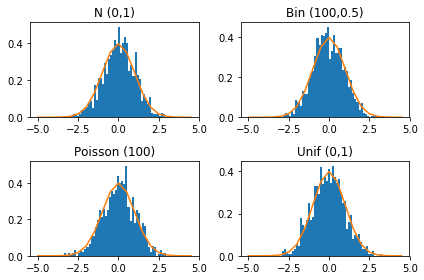

In [292]:
# Q1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_sample = 20
n_draw = 1000

x_norm = np.reshape(np.random.normal(0,1,n_sample*n_draw),(n_draw,n_sample))
x_ber = np.reshape(np.random.binomial(100,0.5,n_sample*n_draw),(n_draw,n_sample))
x_pois = np.reshape(np.random.poisson(100,n_sample*n_draw),(n_draw,n_sample))
x_unif = np.reshape(np.random.uniform(0,1,n_sample*n_draw),(n_draw,n_sample))

def clt(x, mu, n_sample, var):
    return(((np.mean(x,1)-mu)*n_sample**0.5)/var**0.5)
    
X_norm = clt(x_norm, 0, n_sample, 1)
X_ber = clt(x_ber, 50, n_sample, 25)
X_pois = clt(x_pois, 100, n_sample, 100)
X_unif = clt(x_unif, 0.5, n_sample, 1/12)


## plot
x_lim = np.arange(-5,5,0.5)
y_lim = np.arange(0,0.5,0.1)

p1 = plt.subplot(221)
p1.hist(X_norm, 50, normed=1)
p1.set_title('N (0,1)')

p2 = plt.subplot(222)
p2.hist(X_ber, 50, normed=1)
p2.set_title('Bin (100,0.5)')

p3 = plt.subplot(223)
p3.hist(X_pois, 50, normed=1)
p3.set_title('Poisson (100)')

p4 = plt.subplot(224)
p4.hist(X_unif, 50, normed=1)
p4.set_title('Unif (0,1)')

axes = [p1,p2,p3,p4]
for ax in axes:
    ax.plot(x_lim, norm.pdf(x_lim,0,1))
    
_ = plt.tight_layout()
plt.show()

##### Q2-4
Yes, the four plots look very close to nomral. However, when the n is small, the Bin(100, 0.5) seems to be less like normal, while the other three are still very close to normal.

### Problem 2: Plotting a Mixture of Normals

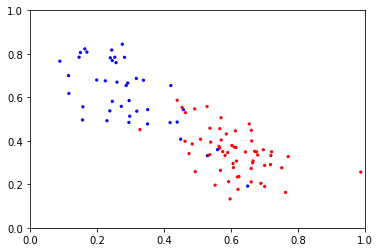

In [282]:
# Q2-2
# load data
import os
os.chdir('/Users/yehhsuan-yu/Umich/Stats701')
labels = np.load('hsuanyu_hw6/labels.npy')
points = np.loadtxt('hsuanyu_hw6/points.dlm')

# plot
g = lambda x: 'red' if x==1 else 'blue'
col = [i for i in map(g, labels)]

plt.scatter(points[:,0],points[:,1], c=col, s=5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

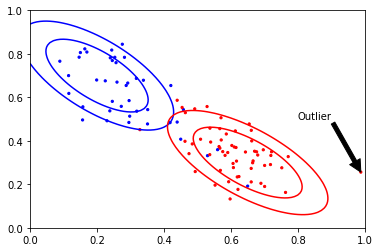

In [281]:
# Q2-3
import scipy.stats
import scipy.optimize as so
mu0 = [0.2, 0.7]
mu1 = [0.65, 0.3]
sigma0 = np.reshape(np.array([0.015, -0.011, -0.011, 0.018]), (2,2))
sigma1 = np.reshape(np.array([0.016, -0.011, -0.011, 0.016]), (2,2))

mvn0 = scipy.stats.multivariate_normal(mu0, sigma0)
mvn1 = scipy.stats.multivariate_normal(mu1, sigma1)

x,y = np.mgrid[0:1:0.01, 0:1:0.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
out = points[30,]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(points[:,0], points[:,1], c=col, s=5)
levels = [scipy.stats.chi2.ppf(0.68,2), scipy.stats.chi2.ppf(0.95,2)]
plt.contour(x, y, mvn0.pdf(pos), levels=levels, colors='blue')
plt.contour(x, y, mvn1.pdf(pos), levels=levels, colors='red')
plt.xlim([0,1])
plt.ylim([0,1])
ax.annotate('Outlier', xy=out, xytext=(0.8,0.5), arrowprops=dict(facecolor='black'))
plt.show()

##### Q2-4
Yes, the data seems to be two groups of Normal distribution and each is a Binormal distribution.

### Problem 3: Conway's Game of Life

In [266]:
# Q3-1
import numpy as np
def is_valid_board(input):
    if not isinstance(input, np.ndarray):
        raise TypeError('The input should be an np.ndarray.')
    else:
        if input.ndim == 2:
            entry = input.flatten()
            if np.all(np.logical_or(entry==0, entry==1)):
                return True
            else:
                return False
        else:
            return False

In [267]:
# Test1
a = np.array([[0,0,1],[1,1,0],[1,1,1]], dtype=float)
is_valid_board(a)

True

In [268]:
# Test2
n = 1
is_valid_board(n)

TypeError: The input should be an np.ndarray.

In [269]:
# Q3-2
def count_score(input, ind):
    m,n = input.shape
    l_nbers = [[x,y] for x in range(ind[0]-1, ind[0]+2) for y in range(ind[1]-1, ind[1]+2)] 
    for i in l_nbers:
        if i[0] < 0:
            i[0] = m-1
        elif i[0] == n:
            i[0] = 0
        if i[1] < 0:
            i[1] = n-1
        elif i[1] == n:
            i[1] = 0

    score = sum([input[i[0], i[1]] for i in l_nbers])
    return(score)    
    
def gol_step(input):
    if is_valid_board(input):
        output = np.ndarray(input.shape)  
        for ind in np.ndindex(input.shape):
            if input[ind]==0:
                score = count_score(input, ind)
                state = score==3
                output[ind] = state*1
                
            elif input[ind]==1:
                score = count_score(input, ind)-1
                state = np.logical_or(score==2, score==3)
                output[ind] = state*1
                
        return(output)    
        
    else:
        raise TypeError('The input should be a valid Game of Life Board.')

In [270]:
# Test1
x = np.array([[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,1,1]])
print(count_score(x, (0,0)))
gol_step(x)

3


array([[1., 1., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [271]:
# Test2
x = 1
gol_step(x)

TypeError: The input should be an np.ndarray.

In [272]:
# Q3-3
def draw_gol_board(board):
    if is_valid_board(board):
        cmap = plt.get_cmap('Greys')
        plt.imshow(board, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
        plt.show()
        
    else:
        raise TypeError('The input should be a valid Game of Life Board.')

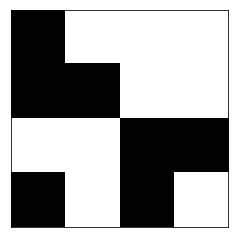

In [273]:
# Test1
x = np.array([[1,0,0,0],[1,1,0,0],[0,0,1,1],[1,0,1,0]])
draw_gol_board(x)

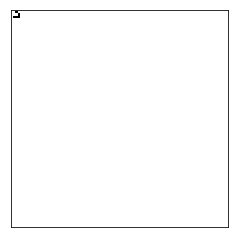

In [274]:
# Q3-4
game_test = np.zeros((100,100))
game_test[0:5,0:5] = [[0,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,1,1,1,0],[0,0,0,0,0]]
draw_gol_board(game_test)

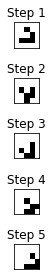

In [275]:
# Q3-5
game_test = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,1,1,1,0],[0,0,0,0,0]])
def plot_list(game_test):
    plot = list()
    for i in range(0,5):
        plot.append(game_test)
        game_test = gol_step(game_test)
    return(plot)

board = plot_list(game_test)

# plot the subplot
cmap = plt.get_cmap('Greys')
plt.subplot(511)
plt.imshow(board[0], cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.title('Step 1')

plt.subplot(512)
plt.imshow(board[1], cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.title('Step 2')

plt.subplot(513)
plt.imshow(board[2], cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.title('Step 3')

plt.subplot(514)
plt.imshow(board[3], cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.title('Step 4')

plt.subplot(515)
plt.imshow(board[4], cmap=cmap)
plt.xticks([])
plt.yticks([])
plt.title('Step 5')

_ = plt.tight_layout()
plt.show()

In [276]:
# Optional exercise
def generate_animate(board, steps):
    for i in range(0, steps):
        draw_gol_board(board)
        board = gol_step(board)
    return(board)

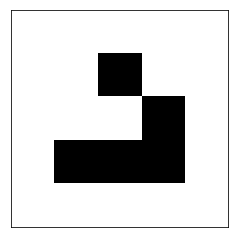

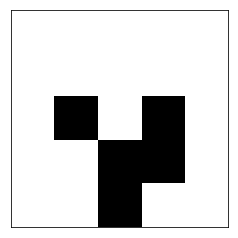

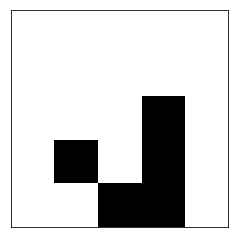

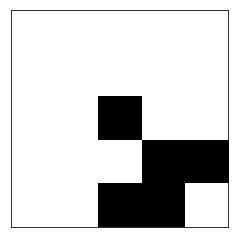

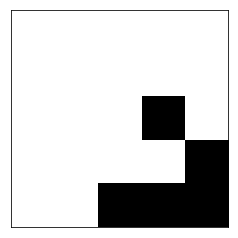

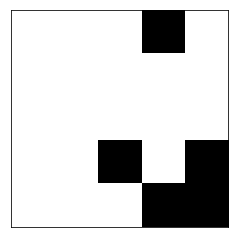

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.]])

In [280]:
# Test 1
x = np.array([[0,0,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,1,1,1,0],[0,0,0,0,0]])
generate_animate(x, 6)